# Introducción

En **Crankshaft List** cientos de anuncios gratuitos de vehículos se publican en su sitio web cada día. Necesitaremos estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [21]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar datos

In [22]:
# Carga el archivo de datos en un DataFrame
df= pd.read_csv ('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/vehicles_us.csv')


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `'price'`      -precio del vehículo
- `'model_year'` -año del vehículo
- `'model'`      -modelo del vehículo
- `'condition'`  -concición en la que se encuentra
- `'cylinders'`  -cilindraje
- `'fuel'`       - gasolina, diesel, etc.
- `'odometer'`   - el millaje del vehículo cuando el anuncio fue publicado
- `'transmission'` -el tipo de transmisión del vehículo
- `'paint_color'`  -el color del vehículo
- `'is_4wd'`     - si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `'date_posted'`- la fecha en la que el anuncio fue publicado
- `'days_listed'`- desde la publicación hasta que se elimina


In [23]:
# imprimimos la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [24]:
# imprimimos una muestra de datos
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


vemos que tenemos que cambiar la columna  de **date_posted** por tipo de date_time, ya que esta como tipo objeto,tambien observamos que hay valores nulos en algunas columnas

In [25]:
df['date_posted'] =  pd.to_datetime(df['date_posted'])


In [26]:
df['date_posted'].dtype

dtype('<M8[ns]')

listo quedo en su formato correcto

vemos una tabla de 51525 filas y 13 columnas.
hay columnas en las cuales hay valores ausentes. (son 5 columnas)

## Tratar los valores ausentes (si hay)

In [27]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

de las 5 columnas **is_4wd** es la que cuenta con mayores valores ausentes con **25953**

### Conclusiones iniciales:



tenemos que trabajar con los valores ausentes de la siguiente manera:

- con `model_year`  sacaremos la mediana para rellenar los valores ausentes,
- con `cylinders` agruparemos y veremos como se relaciona con el modelo del carro 
- con  `odometer` los rellenaremos con la mediana 
- con `paint_color` lo rellenaremos con el color más comun 
- con `is_4wd` al ser booleano solo hay dos posibles respuestas , la forma obvia seria remplazar los valores faltantes por el valor contrario!!

**is_4wd**

In [28]:
#Cambiamos los valores ausentes por cero refiriendonos a que es falso en la columna de 'is_4wd'
df['is_4wd'] = df['is_4wd'].fillna(0)

In [29]:
df['is_4wd'].isnull().sum()


0

Ahora solo quedan 4 columnas con valores ausentes en que trabajar!!

In [30]:
df['model_year'].median()


2011.0

In [31]:
df['model_year'] = df['model_year'].fillna(2011)

In [32]:
df['model_year'].isna().sum()

0

**cylinders**

In [33]:
#vamos a rellenar los valores de la columna 'cylinders', sacando la moda que hay de cilindros por el modelo de vehiculo
cylinder_mode_by_model = df.groupby(["model", "cylinders"])["price"].count().reset_index().rename(columns={"price": "num_vehiculos"}).sort_values(by="num_vehiculos", ascending=False).reset_index(drop=True).groupby("model").head(1).sort_values(by="model")
cylinder_mode_by_model



,model,cylinders,num_vehiculos
90,acura tl,6.0,208
95,bmw x5,6.0,200
76,buick enclave,6.0,245
58,cadillac escalade,8.0,290
82,chevrolet camaro,6.0,223
...,...,...,...
60,toyota sienna,6.0,285
24,toyota tacoma,6.0,486
20,toyota tundra,8.0,500
44,volkswagen jetta,4.0,339


In [34]:
#esta funcion es para rellenar los valores ausentes de la columna cylinders
def fill_na_cylinders(row):
    model = row["model"]

    if pd.isna(row["cylinders"]):
        return cylinder_mode_by_model[cylinder_mode_by_model['model'] == model]["cylinders"]
    else:
        return row["cylinders"]



   


In [35]:
#aqui relleno los valores ausentes con el metodo fillna en la columna de cylinders con la funcion que cree anteriormente
df["cylinders"] = df.apply( fill_na_cylinders, axis=1)

In [36]:
df['cylinders'].isna().sum()

0

**odometer**

In [37]:
#Usaremos la mediana para rellenar los valores ausentes de 'odometer'
mediana_odometer = df['odometer'].median()
mediana_odometer 

113000.0

In [38]:
df['odometer'] = df['odometer'].fillna(mediana_odometer )

In [39]:
df['odometer'].isna().sum()

0

**paint_color**

In [40]:
#usaremos el color más común para rellenar los valores ausentes de la variable 'paint_color' 
df['paint_color'].value_counts()

paint_color
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

In [41]:
df['paint_color'] = df['paint_color'].fillna('white')

In [42]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Con eso terminamos con los valores ausentes!!

## corregiremos los tipos de datos si es necesario

In [43]:
df.dtypes

price                    int64
model_year             float64
model                   object
condition               object
cylinders               object
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                 float64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

In [44]:
#Vamos acorregir los tipos de dato de nuestro dataframe de los que consideramos estan aún incorrectos
df['price'] = df['price'].astype("float")
df['model_year'] = df['model_year'].astype('int')
df['cylinders'] = df['cylinders'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('int')
df['days_listed'] = df['days_listed'].astype('float')


C:\Users\T3R4BYT3\AppData\Local\Temp\ipykernel_22268\3466449777.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['cylinders'] = df['cylinders'].astype('int')


In [45]:
df.dtypes

price                  float64
model_year               int32
model                   object
condition               object
cylinders                int32
fuel                    object
odometer                 int32
transmission            object
type                    object
paint_color             object
is_4wd                   int32
date_posted     datetime64[ns]
days_listed            float64
dtype: object

Ya quedaron actualizados nuestros tipos de datos

# Enriquecimiento de nuestros datos

In [46]:
# Sacamos la edad de los vehiculos restando la fecha cuando se posteo menos el año del modelo de nuestros vehiculos
df["vehicle_age"] = df["date_posted"].dt.year - df["model_year"]
df["vehicle_age"].head(3)


0    7
1    7
2    6
Name: vehicle_age, dtype: int32

In [47]:
# Agregamos el millaje promedio del vehículo por año
df["mean_miles"] = df["odometer"] / df["vehicle_age"]
df["mean_miles"].head(3)

0    20714.285714
1    12672.142857
2    18333.333333
Name: mean_miles, dtype: float64

In [48]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

condition_easy = {
     'new': 5,
    'excellent': 4,
     'like new': 3,
     'good': 2,
    'fair': 1,
    'salvage': 0
 }
df["condition_num"] = df["condition"].replace(condition_easy)
df["condition_num"].head(3)

0    2
1    2
2    3
Name: condition_num, dtype: int64

In [49]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'vehicle_age', 'mean_miles',
       'condition_num'],
      dtype='object')

# Comprobamos los datos limpios

In [50]:
# imprimimos la información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  float64       
 1   model_year     51525 non-null  int32         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  object        
 4   cylinders      51525 non-null  int32         
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  int32         
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  int32         
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  float64       
 13  vehicle_age    51525 non-null  int32         
 14  mean_miles     51523 non-null  float64       
 15  condition_num  5152

In [51]:
# imprimir una muestra de datos
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mean_miles,condition_num
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19.0,7,20714.285714,2
1,25500.0,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50.0,7,12672.142857,2
2,5500.0,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79.0,6,18333.333333,3
3,1500.0,2003,ford f-150,fair,8,gas,113000,automatic,pickup,white,0,2019-03-22,9.0,16,7062.500000,1
4,14900.0,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28.0,2,40451.500000,4


## Estudiar parámetros principales




Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

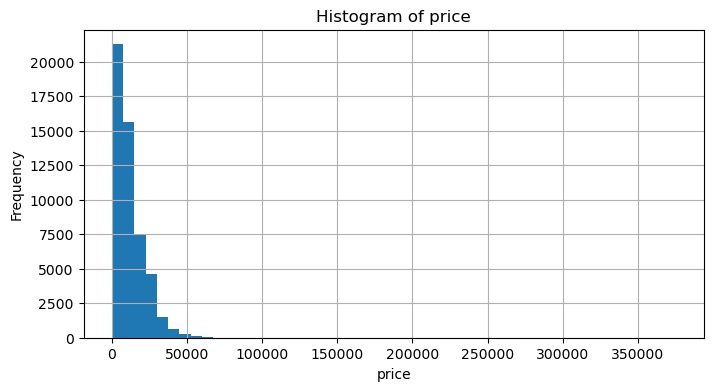

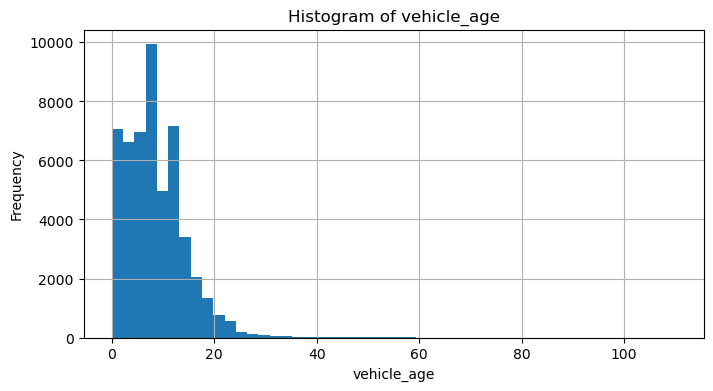

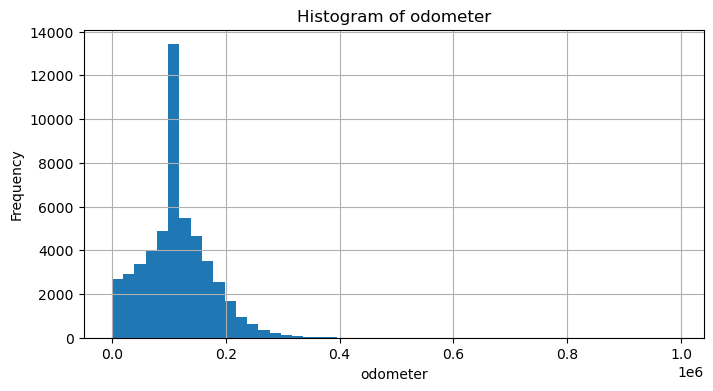

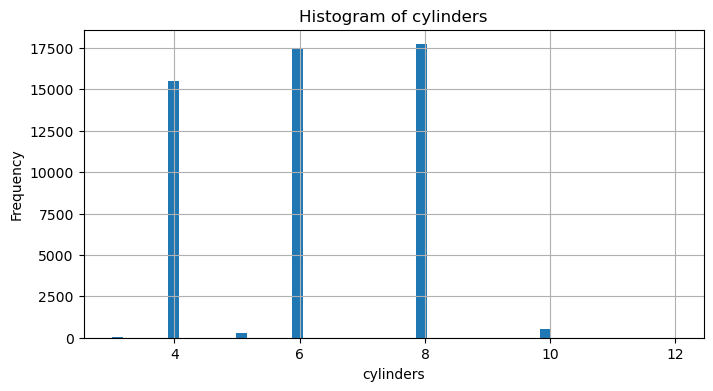

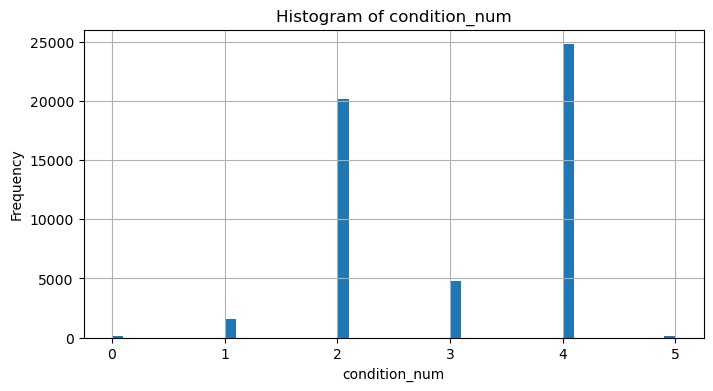

In [52]:
parametros_enumerados = ["price", "vehicle_age", "odometer", "cylinders", 'condition_num']

for col in parametros_enumerados:
    plt.figure(figsize=(8, 4))
    plt.title(f"Histogram of {col}")
    df[col].hist(bins=50)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



## Tratar valores atípicos


In [53]:
# Crear un nuevo DataFrame sin valores atípicos
df_sin_atipicos = df.copy()

In [54]:
# Calcular el rango intercuartílico (IQR)
for col in parametros_enumerados:
       
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

In [55]:
IQR

2.0

In [56]:
# Determinamos los límites inferiores para valores atípicos
lower_limit = Q1 - 1.5 * IQR


In [57]:
# Determinamos los límites superiores para valores atípicos
upper_limit = Q3 + 1.5 * IQR


In [58]:
# Almacenamos los datos sin valores atípicos en un DataFrame separado
df_sin_atipicos = df_sin_atipicos[(df_sin_atipicos[col] >= lower_limit) & (df_sin_atipicos[col] <= upper_limit)]
df_sin_atipicos.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,vehicle_age,mean_miles,condition_num
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,white,1,2018-06-23,19.0,7,20714.285714,2
1,25500.0,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50.0,7,12672.142857,2
2,5500.0,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79.0,6,18333.333333,3
3,1500.0,2003,ford f-150,fair,8,gas,113000,automatic,pickup,white,0,2019-03-22,9.0,16,7062.500000,1
4,14900.0,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28.0,2,40451.500000,4


## Estudiar parámetros principales sin valores atípicos

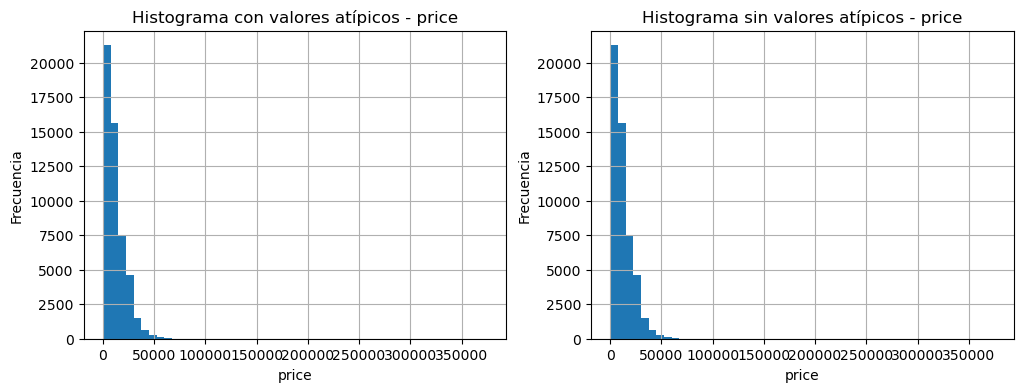

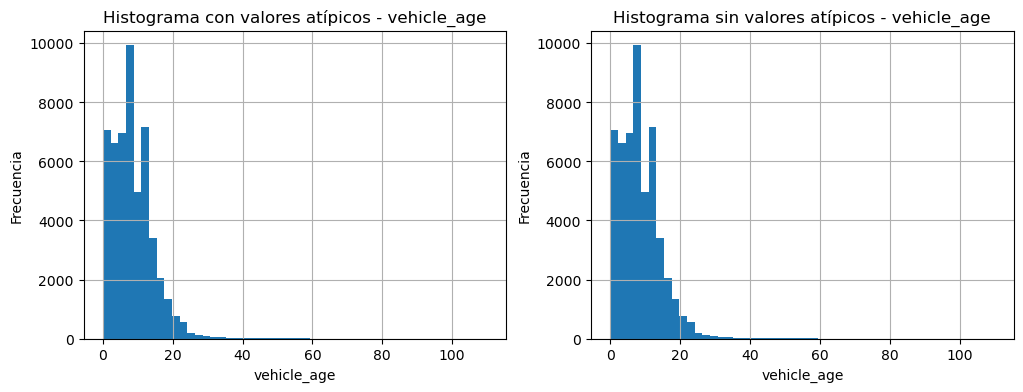

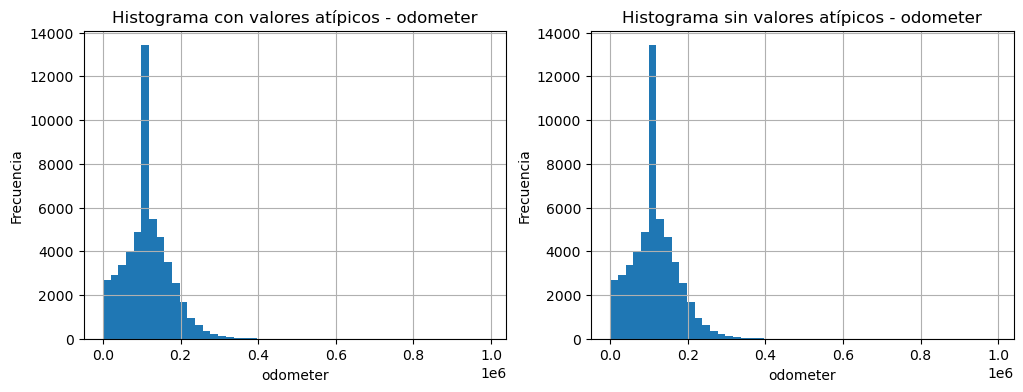

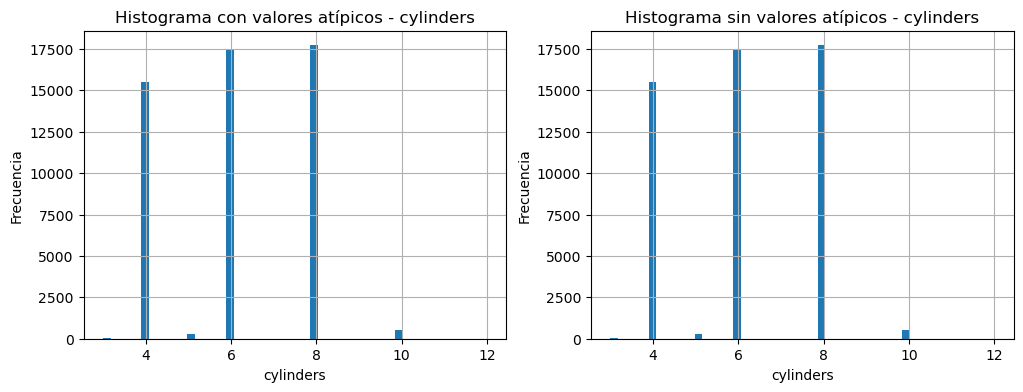

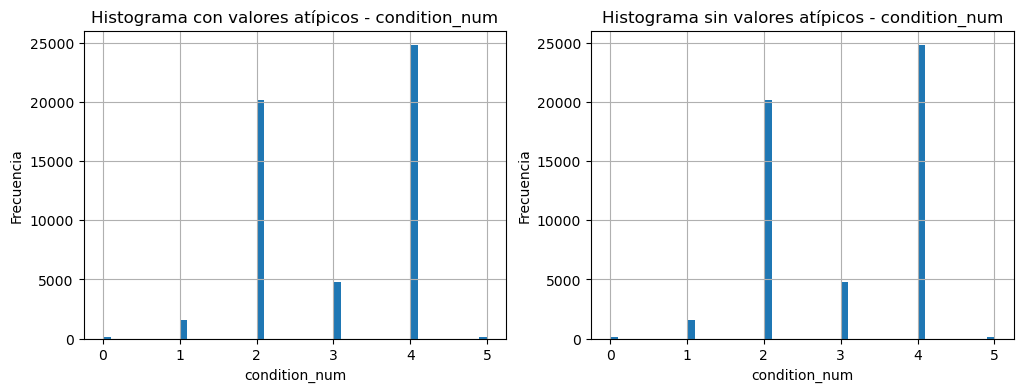

In [59]:
for col in parametros_enumerados:
    # Creación de  subplots para comparar histogramas
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Histograma con valores atípicos
    axes[0].set_title(f"Histograma con valores atípicos - {col}")
    df[col].hist(bins=50, ax=axes[0])
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frecuencia")

    # Histograma sin valores atípicos
    axes[1].set_title(f"Histograma sin valores atípicos - {col}")
    df_sin_atipicos[col].hist(bins=50, ax=axes[1])
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("Frecuencia")

    plt.show()

## Periodo de colocación de los anuncios



In [60]:
# Calcular la media y la mediana
media_days = df['days_listed'].mean()
mediana_days = df['days_listed'].median()

<Axes: ylabel='Frequency'>

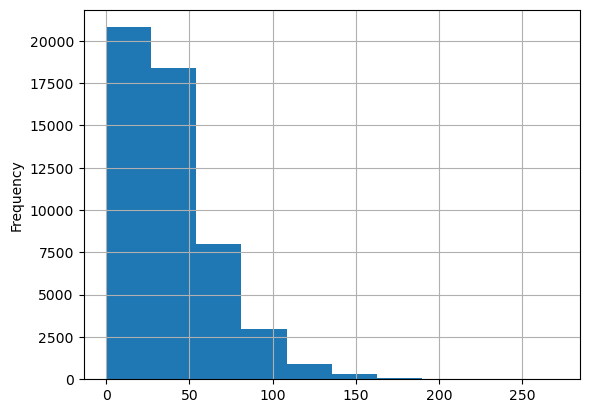

In [61]:
df['days_listed'].plot(kind='hist', bins=10, x= 'days', grid ='True' )

In [62]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

vemos que de acuedo al histograma arriba de 50 dias es un tiempo anormalmente alto la mayoria de vehiculos vendidos duran no menos a 50 dias.y como de 0 a 20 dias se eliminan rápidamente los anuncios.

## Precio promedio por cada tipo de vehículo

In [63]:
df['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'SUV'),
  Text(1, 0, 'bus'),
  Text(2, 0, 'convertible'),
  Text(3, 0, 'coupe'),
  Text(4, 0, 'hatchback'),
  Text(5, 0, 'mini-van'),
  Text(6, 0, 'offroad'),
  Text(7, 0, 'other'),
  Text(8, 0, 'pickup'),
  Text(9, 0, 'sedan'),
  Text(10, 0, 'truck'),
  Text(11, 0, 'van'),
  Text(12, 0, 'wagon')])

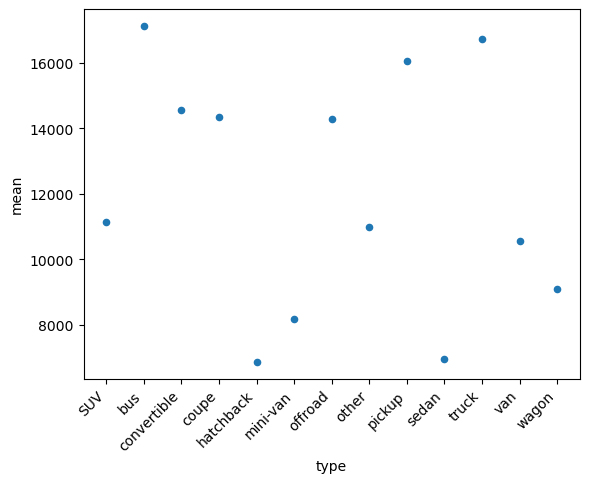

In [64]:
# Agrupamos por tipo de vehículo y calculamos el número de anuncios y el precio promedio
grouped_data = df.groupby('type')['price'].agg(['mean']).reset_index()

grouped_data.plot(kind="scatter", x="type", y="mean")
plt.xticks(rotation=45, ha='right') 

In [65]:
popular_types = grouped_data.sort_values(by="mean", ascending=False).head(5)
popular_types

,type,mean
1,bus,17135.666667
10,truck,16734.894924
8,pickup,16057.410418
2,convertible,14575.881166
3,coupe,14353.442901


## Factores de precio

¿Qué factores impactan más sobre el precio? tomamos los dos primeros tipos de vehiculo más populares('bus', 'truck') y vamos a estudiar si el precio depende de el tipo de transmision, color, la edad del vehiculo, millaje y condición,

In [66]:
# Filtramos el DataFrame para incluir solo los tipos de vehículos más populares
df_populares = df[df['type'].isin(popular_types)]

In [67]:
# Matriz de correlación
correlation_matrix = df_populares.corr()


C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\T3R4BYT3\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


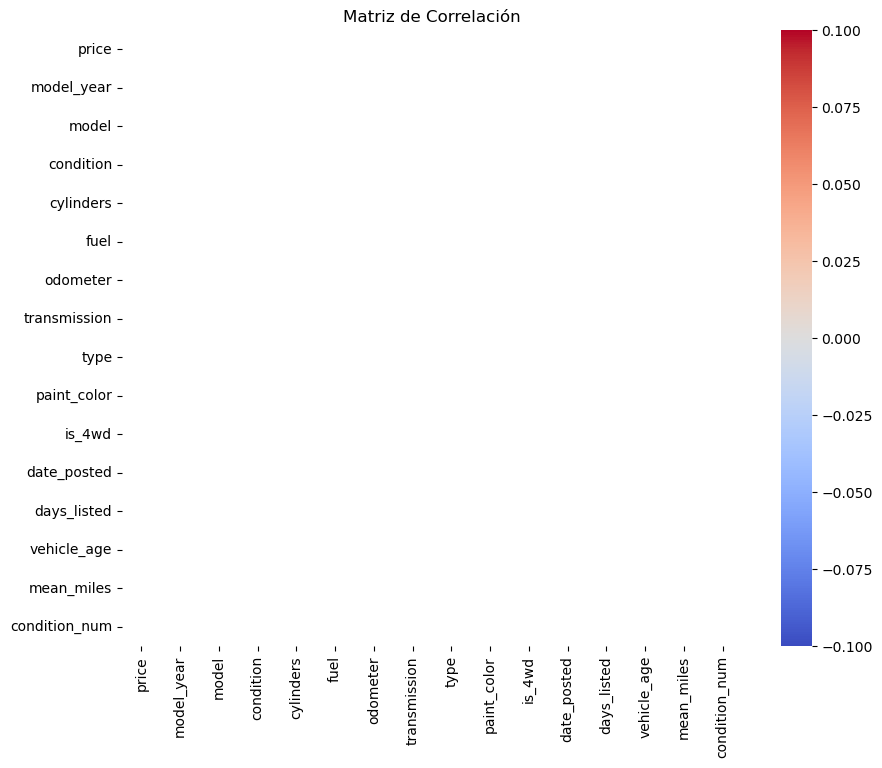

In [68]:
# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [69]:
#Hacemos un filtrado con más de 50 anuncios y que sea de tipo truck
filtro_truck = df[(df['days_listed'] > 50)  & (df['type'] == 'truck')] 
filtro_truck.shape

(3443, 16)

In [70]:
#Hacemos un filtrado con más de 50 anuncios y que sea de tipo bus
filtro_bus =  df[(df['days_listed'] > 50)  & (df['type'] == 'bus')] 
filtro_bus.shape

(10, 16)

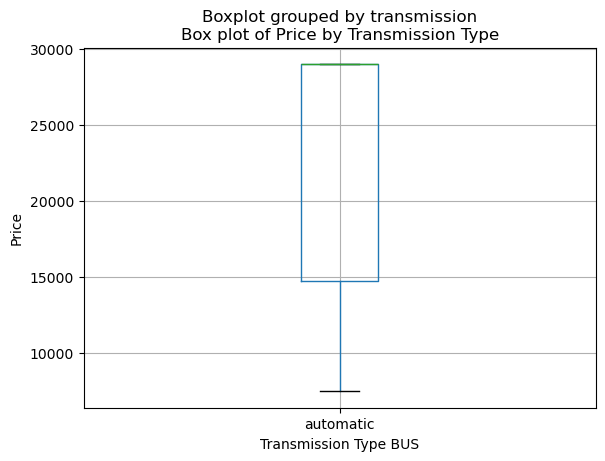

In [71]:
# Gráficos de caja y bigotes para variables categóricas
filtro_bus.boxplot(column='price', by='transmission', showfliers=False)
plt.title('Box plot of Price by Transmission Type')
plt.xlabel('Transmission Type BUS'),
plt.ylabel('Price')
plt.show()


<Figure size 5000x2500 with 0 Axes>

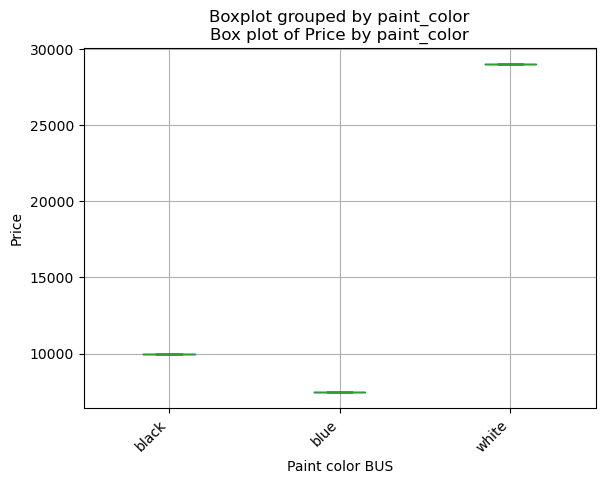

In [72]:
# Gráficos de caja y bigotes para variables categóricas
plt.figure(figsize=(50, 25))
filtro_bus.boxplot(column='price', by='paint_color', showfliers=False )
plt.xticks(rotation=45, ha='right') 
plt.title('Box plot of Price by paint_color')
plt.xlabel('Paint color BUS')
plt.ylabel('Price')
plt.show()

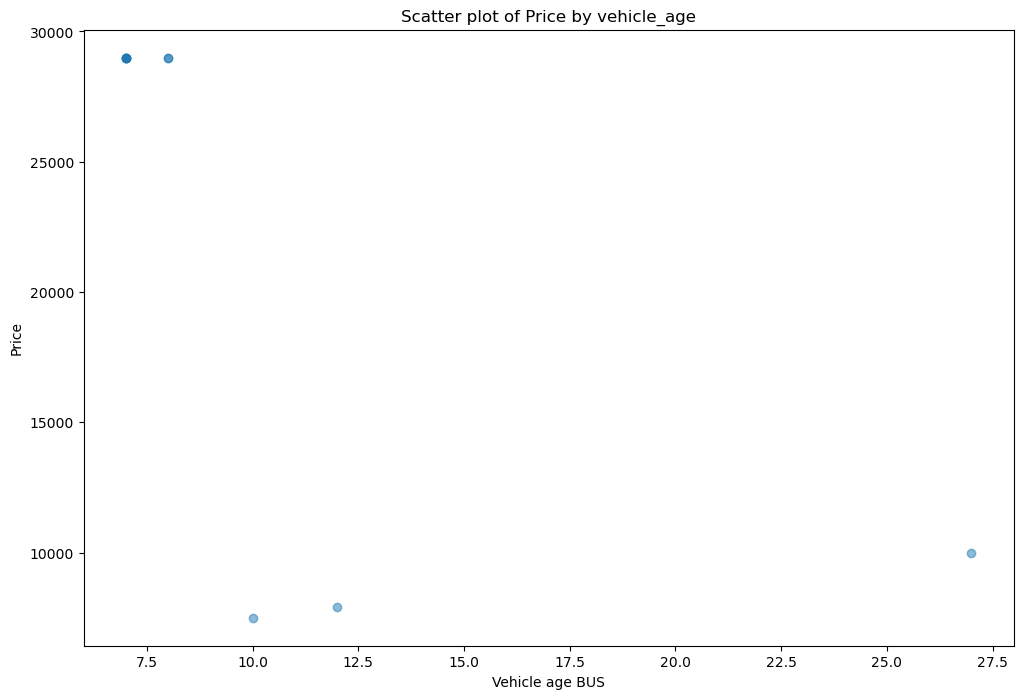

In [73]:
# Gráficos de dispersión para variables numérica
plt.figure(figsize=(12, 8))  
# Crear un gráfico de dispersión
plt.scatter(x=filtro_bus['vehicle_age'], y=filtro_bus['price'], alpha=0.5)

plt.title('Scatter plot of Price by vehicle_age')
plt.xlabel('Vehicle age BUS')
plt.ylabel('Price')
plt.show()





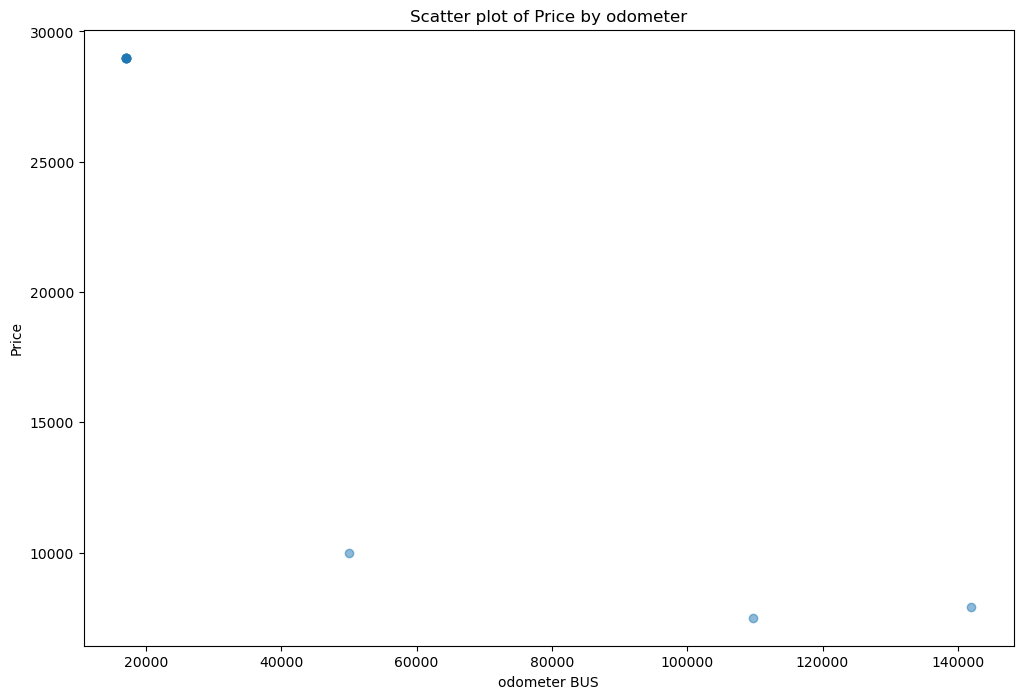

In [74]:
# Gráficos de dispersión para variables numérica
plt.figure(figsize=(12, 8))  
# Crear un gráfico de dispersión
plt.scatter(x=filtro_bus['odometer'], y=filtro_bus['price'], alpha=0.5)

plt.title('Scatter plot of Price by odometer')
plt.xlabel('odometer BUS')
plt.ylabel('Price')
plt.show()

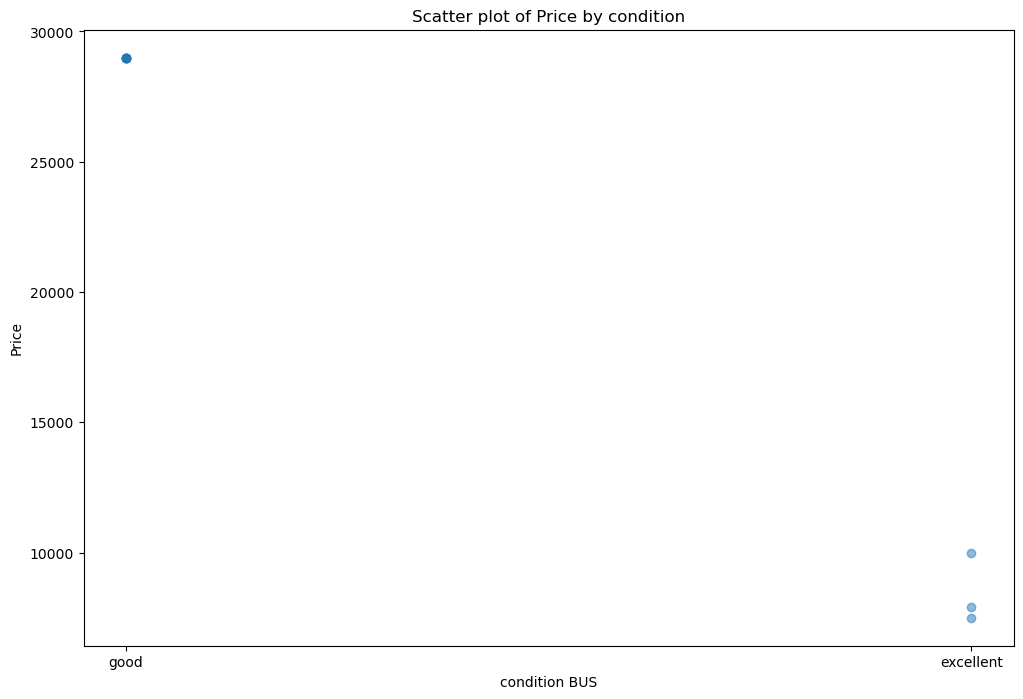

In [75]:
# Gráficos de dispersión para variables numérica
plt.figure(figsize=(12, 8))  
# Crear un gráfico de dispersión
plt.scatter(x=filtro_bus['condition'], y=filtro_bus['price'], alpha=0.5)

plt.title('Scatter plot of Price by condition')
plt.xlabel('condition BUS')
plt.ylabel('Price')
plt.show()

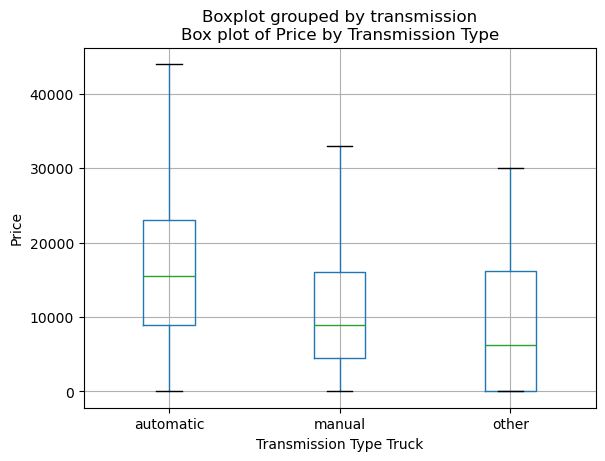

In [76]:
# Gráficos de caja y bigotes para variables categóricas
filtro_truck.boxplot(column='price', by='transmission', showfliers=False)
plt.title('Box plot of Price by Transmission Type')
plt.xlabel('Transmission Type Truck'),
plt.ylabel('Price')
plt.show()

<Figure size 5000x2500 with 0 Axes>

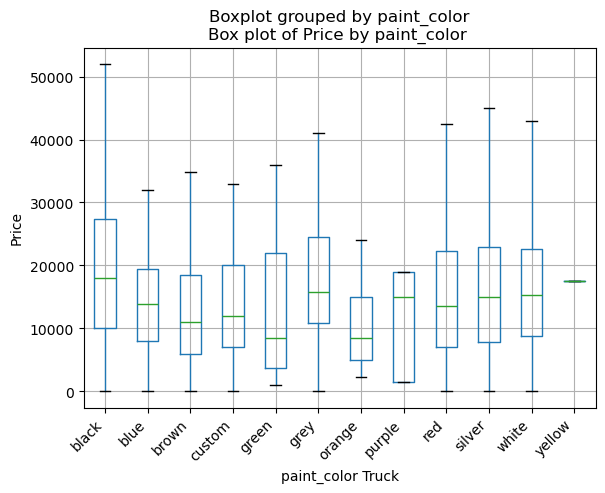

In [77]:
# Gráficos de caja y bigotes para variables categóricas
plt.figure(figsize=(50, 25))
filtro_truck.boxplot(column='price', by='paint_color',showfliers=False )
plt.xticks(rotation=45, ha='right') 
plt.title('Box plot of Price by paint_color ')
plt.xlabel('paint_color Truck')
plt.ylabel('Price')
plt.show()


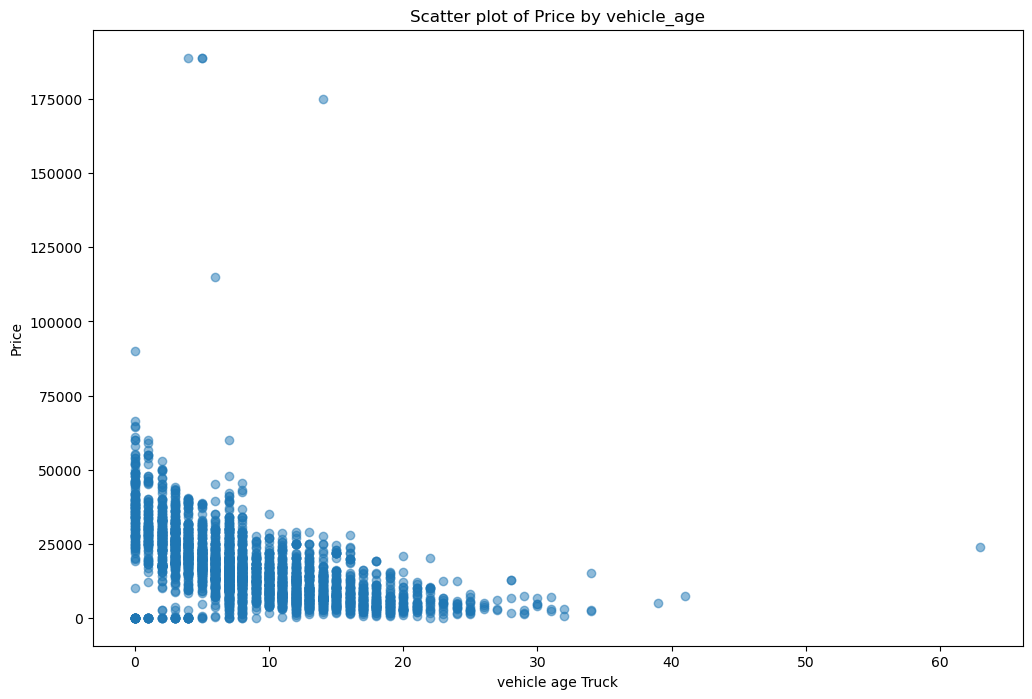

In [78]:
# Gráficos de dispersión para variables numérica
plt.figure(figsize=(12, 8))  
# Crear un gráfico de dispersión
plt.scatter(x=filtro_truck['vehicle_age'], y=filtro_truck['price'], alpha=0.5)

plt.title('Scatter plot of Price by vehicle_age')
plt.xlabel('vehicle age Truck')
plt.ylabel('Price')
plt.show()

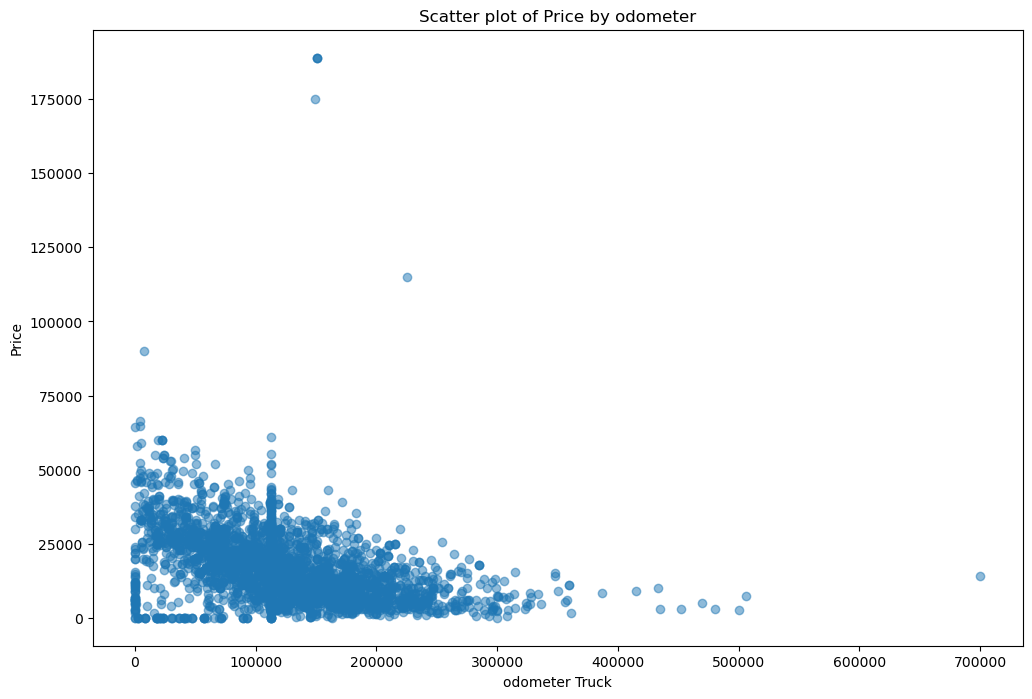

In [79]:
# Gráficos de dispersión para variables numérica
plt.figure(figsize=(12, 8))  
# Crear un gráfico de dispersión
plt.scatter(x=filtro_truck['odometer'], y=filtro_truck['price'], alpha=0.5)

plt.title('Scatter plot of Price by odometer')
plt.xlabel('odometer Truck')
plt.ylabel('Price')
plt.show()

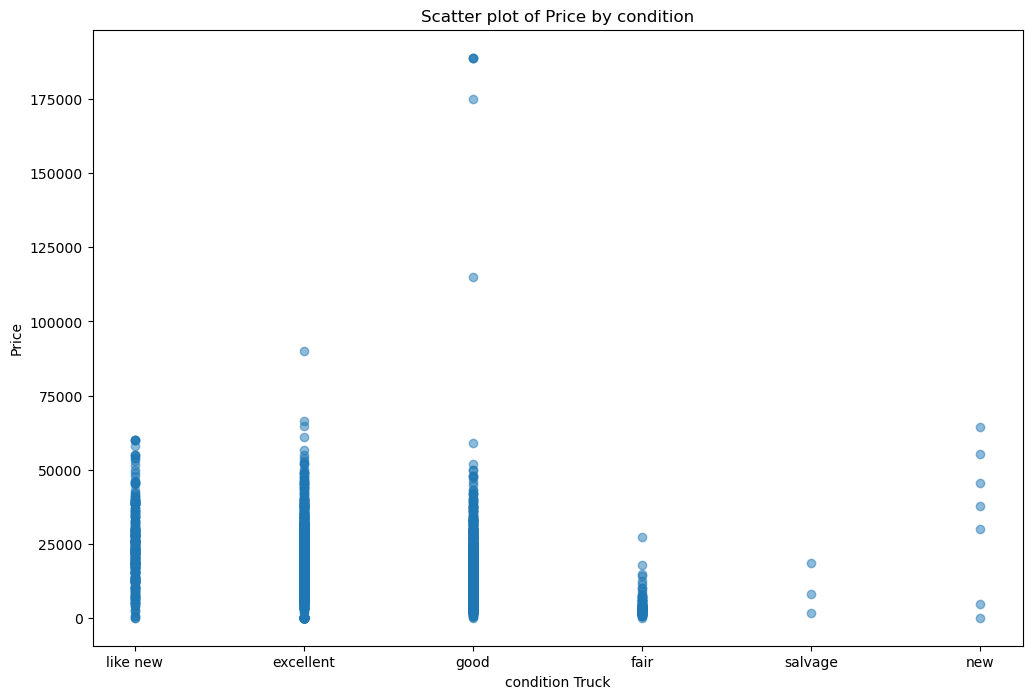

In [80]:
plt.figure(figsize=(12, 8))  
# Crear un gráfico de dispersión
plt.scatter(x=filtro_truck['condition'], y=filtro_truck['price'], alpha=0.5)

plt.title('Scatter plot of Price by condition')
plt.xlabel('condition Truck')
plt.ylabel('Price')
plt.show()

## Conclusión general



**Preprocesamos los datos:**

- Remplazamos lo valores ausentes usando(la mediana,la moda, usamos el valor más comun en paint_color, Buscamos tambien patrones en los datos agrupandolos o en valores booleanos rellenamos con el opuesto al valor 

- Corregimos los tipos de datos

- Agregamos valores adicionales al dataframe como el promedio del millaje, los años del vehiculo desde su pubicacion etc...

**Visualizamos los datos:**

- Realizamos histogramas estudiando y comparando con valores atipicos y sin valores atipicos de algunos parametros: precio, los años del vehículo cuando el anuncio se colocó, millaje, número de cilindros y la condicion

- observamos el periodo de colocación de los anuncios siendo por arriba de 50 dias listados es un tiempo anormalmente alto la mayoria de vehiculos vendidos duran no menos a 50 dias y como de 0 a 20 dias se eliminan rápidamente los anuncios.

- observamos tambien en grafica de dispersion el promedio de precio por tipo de vehiculo siendo el bus con mayor precio promedio

- Tambien obtuvimos los dos tipos más populares: bus y truck

- Y realizamos graficas de dispersion para observar que factores impactaban  más sobre el precio si el precio tenia que ver con el tipo de transmision, color, la edad del vehiculo, millaje o condición,

**LOS FACTORES QUE MAS IMPACTAN EN EL BUS SON:**
- automatico
- blanco 
- 7 a 8 años
- un millaje de casi 200000 de millaje
- condicion buena


**LOS FACTORES QUE MAS IMPACTAN  EN TRUCK SON:**
- automatico
- color negro
- 6 a 7 años 
- 150 mil millas 
- condicion buena


